In [1]:
from rdkit import Chem
import os
import MDAnalysis as mda
import warnings
warnings.filterwarnings('ignore')
import nglview as nv

/Users/hannahturney/miniconda3/envs/openff-environment/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


RingGroup properties:
smiles= c1ccccc1


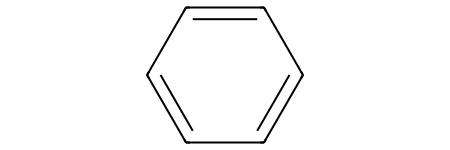

In [2]:
#Define RingGroup
class RingGroup:
    """A class to define properties of a ring group in a universe"""
    def __init__(self, smiles):
        self.s = smiles

ring = RingGroup('c1ccccc1')
print("RingGroup properties:") 
print("smiles=", ring.s)
Chem.MolFromSmiles(ring.s)

### Armadillo Demo with Alzheimers Tau Human Protein

PDB = 8FUG
https://www.rcsb.org/structure/8FUG

https://www.nature.com/articles/s41467-019-13745-7#:~:text=Aggregation%20of%20the%20Tau%20protein,protein%20binding%20to%20Tau%20fibrils.

In [6]:
#Define an MDAnalysis universe from example data
u = mda.Universe('./Inputs/8FUG_tau.pdb')
u

<Universe with 27070 atoms>

In [4]:
nv.show_mdanalysis(u)

NGLWidget()

In [5]:
ag = sum(u.atoms.fragments) 
ag

<AtomGroup with 27070 atoms>

In [9]:
os.chdir('../')
from armadillo import armadillo

In [10]:
#Find all the rings in the universe
ring_list = armadillo.find_all_rings(ag, u)
ring_list[:6]

[<AtomGroup with 6 atoms>,
 <AtomGroup with 5 atoms>,
 <AtomGroup with 5 atoms>,
 <AtomGroup with 5 atoms>,
 <AtomGroup with 5 atoms>,
 <AtomGroup with 6 atoms>]

In [13]:
#Names of residues in ring_list
residues = [x.residues.resnames[0] for x in ring_list]
residues[:6]

['TYR', 'PRO', 'HIS', 'HIS', 'PRO', 'PHE']

In [14]:
len(residues)

322

In [15]:
#Look at ring groups
view = nv.show_file(u)
view.add_ball_and_stick("ring")
view

NGLWidget()

In [11]:
#Calculate the distance between 2 rings in the ring list using ring_distance
armadillo.ring_distance(ring_list[0], ring_list[1], ag)

4.635857406329091

In [12]:
#Calculate the angle in degrees between 2 rings in the ring list using ring_normal_angle
armadillo.ring_normal_angle(ring_list[0], ring_list[4])

62.79168

In [13]:
#Ad hoc test to determmine if pi-stacking has occurred by testing distance and alpha angle
armadillo.pi_stacking(ring_list[0], ring_list[1], ag, 5, 80)

False

In [14]:
#Find pi stacking rings in the ring list
armadillo.find_pi_stacking_rings(ring_list, ag)

([[309, 289],
  [289, 261],
  [261, 233],
  [233, 205],
  [205, 177],
  [177, 149],
  [149, 121],
  [121, 93],
  [93, 65],
  [65, 37],
  [37, 9],
  [300, 280],
  [280, 252],
  [252, 224],
  [224, 196],
  [196, 168],
  [305, 285],
  [285, 257],
  [257, 229],
  [229, 201],
  [201, 173],
  [173, 145],
  [145, 117],
  [117, 89],
  [89, 61],
  [61, 33],
  [33, 5],
  [308, 288],
  [301, 281],
  [288, 260],
  [260, 232],
  [232, 204],
  [204, 176],
  [281, 253],
  [253, 225],
  [225, 197],
  [197, 169],
  [168, 140],
  [169, 141],
  [140, 112],
  [112, 84],
  [84, 56],
  [56, 28],
  [28, 0],
  [176, 148],
  [148, 120],
  [120, 92],
  [92, 64],
  [64, 36],
  [36, 8],
  [141, 113],
  [113, 85],
  [85, 57],
  [57, 29],
  [29, 1],
  [279, 251],
  [251, 223],
  [223, 195],
  [195, 167],
  [167, 139],
  [139, 111],
  [111, 83],
  [83, 55],
  [55, 27],
  [27, 321],
  [277, 250],
  [277, 249],
  [249, 276],
  [249, 222],
  [249, 221],
  [278, 250],
  [276, 250],
  [276, 248],
  [250, 222],
  [248, 22

In [23]:
u = mda.Universe('./Notebooks/Outputs/trajectory_pdb.pdb',
                './Notebooks/Outputs/trajectory_dcd.dcd')

In [24]:
nv.show_mdanalysis(u)

NGLWidget(max_frame=24)

In [25]:
pi_parallel_stacking=[]
pi_t_shaped = []
for ts in u.trajectory:
    parallel_stacking, t_shaped = armadillo.find_pi_stacking_rings(ring_list, ag)
    pi_parallel_stacking.append(parallel_stacking)
    pi_t_shaped.append(t_shaped)

In [28]:
stack_view = nv.show_mdanalysis(u)
for i in pi_parallel_stacking[0]:
    stack_view.add_ball_and_stick(i)
stack_view

NGLWidget(max_frame=24)